<a href="https://colab.research.google.com/github/kartik10sharma/cv_prj/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2


bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


smile data for p61 is used


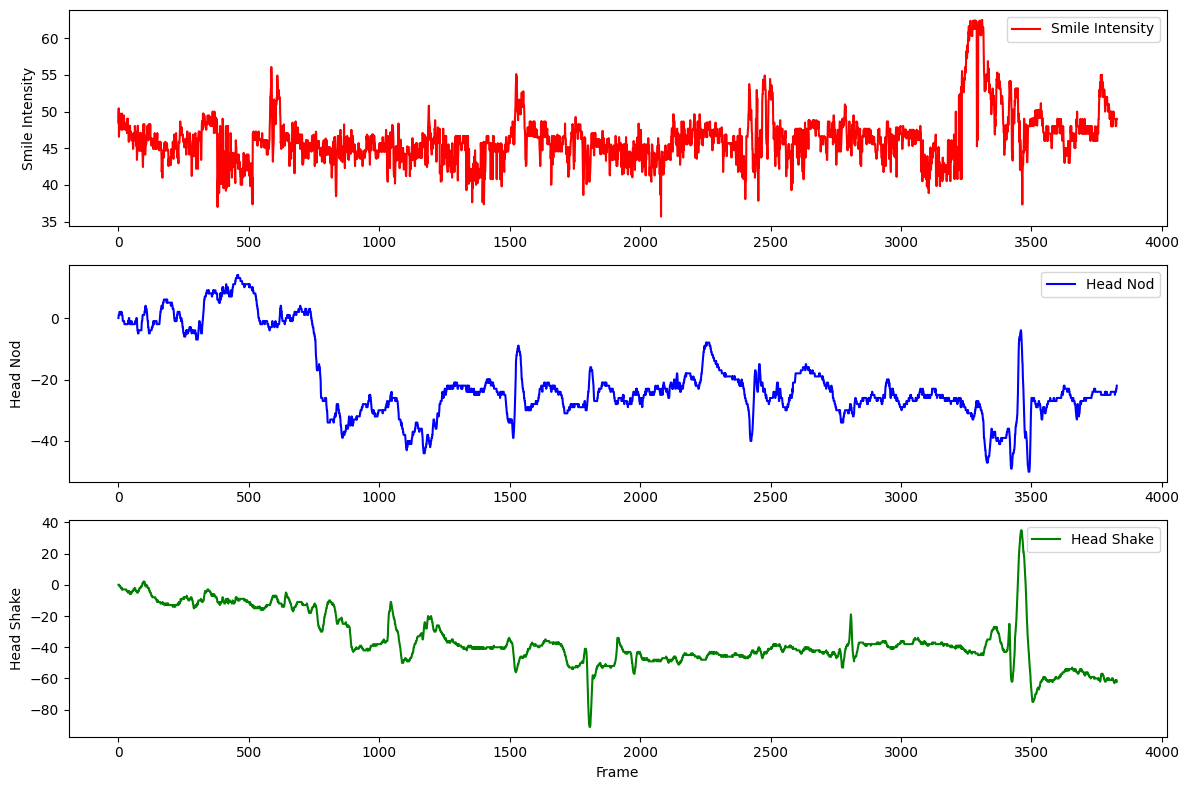

Detected 24 smile events above threshold.
Statistics saved to smile_stats_video.csv


In [17]:
import cv2
import dlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dlib's face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
# Replace 'path/to/shape_predictor_68_face_landmarks.dat' with the actual path
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')


# Initialize video capture
video_path = '/content/P61.avi'
cap = cv2.VideoCapture(video_path)

smile_intensity_list = []
head_nod_list = []
head_shake_list = []

frame_num = 0
initial_nose_y = None
initial_nose_x = None

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Smile Intensity: Distance between mouth corners
        left = np.array([landmarks.part(48).x, landmarks.part(48).y])
        right = np.array([landmarks.part(54).x, landmarks.part(54).y])
        smile_intensity = np.linalg.norm(right - left)
        smile_intensity_list.append(smile_intensity)

        # Head nod/shake: Nose tip movement (point 30)
        nose = np.array([landmarks.part(30).x, landmarks.part(30).y])

        if initial_nose_y is None:
            initial_nose_y = nose[1]
            initial_nose_x = nose[0]

        # Vertical displacement = nod, Horizontal = shake
        head_nod_list.append(nose[1] - initial_nose_y)
        head_shake_list.append(nose[0] - initial_nose_x)

        break  # Use only one face (for now)

    frame_num += 1

cap.release()
cv2.destroyAllWindows()

# Convert to NumPy arrays
smile_intensity = np.array(smile_intensity_list)
head_nod = np.array(head_nod_list)
head_shake = np.array(head_shake_list)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(smile_intensity, color='red', label='Smile Intensity')
plt.ylabel('Smile Intensity')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(head_nod, color='blue', label='Head Nod')
plt.ylabel('Head Nod')
plt.legend()
import cv2
import dlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dlib's face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
# Replace 'path/to/shape_predictor_68_face_landmarks.dat' with the actual path
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')



[ ]
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the data (change file path and separator as needed)
file_path = '/content/Smoothed-features-P61.txt'  # Use your actual filename
# Assuming the values are separated by spaces within each row of the first column
df = pd.read_csv(file_path, sep='\t', header=None)

# 2. Extract and process the smile intensity column
# Split the string in the first column by spaces and convert to numeric
all_features = df.iloc[:, 0].str.split(expand=True).astype(float)
smile_intensity = all_features.iloc[:, 1] # Assuming smile intensity is in the 13th column (index 12)


# 3. Extract head nod and head shake data (assuming they are in specific columns)

head_nod = all_features.iloc[:, 3]
head_shake = all_features.iloc[:, 4]


# 4. Plot smile intensity, head nod, and head shake
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(smile_intensity, color='red', label='Smile Intensity')
plt.ylabel('Smile Intensity')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(head_nod, color='blue', label='Head Nod')
plt.ylabel('Head Nod')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(head_shake, color='green', label='Head Shake')
plt.xlabel('Frame')
plt.ylabel('Head Shake')
plt.legend()

plt.tight_layout()
plt.show()

# 5. (Optional) Detect smile events above a threshold
def detect_smile_events(smile_data, threshold=1.0, min_duration=2):
    events = []
    in_smile = False
    start = 0
    for i, val in enumerate(smile_data):
        if not in_smile and val > threshold:
            in_smile = True
            start = i
        elif in_smile and val <= threshold:
            in_smile = False
            if i - start >= min_duration:
                events.append((start, i-1))
    return events

events = detect_smile_events(smile_intensity)
print(f"Detected {len(events)} smile events above threshold.")

# 6. (Optional) Save statistics to CSV
stats = {
    'mean': [smile_intensity.mean()],
    'std': [smile_intensity.std()],
    'max': [smile_intensity.max()],
    'min': [smile_intensity.min()],
    'num_events': [len(events)]
}
stats_df = pd.DataFrame(stats)
stats_df.to_csv('smile_stats.csv', index=False)
print("Statistics saved to smile_stats.csv")


[3]
import cv2
import dlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dlib's face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')


Yawning


[ ]
# 3. Plot the yawn values
plt.figure(figsize=(10, 6))
plt.plot(yawn, color='green', label='Yawn Intensity')
plt.xlabel('Frame')
plt.ylabel('Yawn Value')
plt.title('Yawn Value over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Batch Process of yawning


[ ]
    'std': [yawn_distances.std()],
    'max': [yawn_distances.max()],
    'min': [yawn_distances.min()],
    'num_events': [len(yawn_events)],
    'threshold': [dynamic_threshold]
}
stats_df = pd.DataFrame(stats)
stats_df.to_csv('yawn_stats_video.csv', index=False)
print("Statistics saved to yawn_stats_video.csv")

Processed: PP55.csv | Events: 2
Processed: PP45.csv | Events: 6
Processed: PP4.csv | Events: 5
Processed: P83.csv | Events: 20
Processed: PP56.csv | Events: 1
Processed: PP31.csv | Events: 54
<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)
Processed: PP81.csv | Events: 9
<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)
Processed: P64.csv | Events: 2
Processed: PP72.csv | Events: 4
Processed: PP64.csv | Events: 10
Processed: PP57.csv | Events: 25
Processed: P10.csv | Events: 3
Processed: P4.csv | Events: 7
Processed: P5.csv | Events: 12
Processed: P58.csv | Events: 2
Processed: PP78.csv | Events: 9
Processed: PP24.csv | Events: 1
Processed: PP5.csv | Events: 6
Processed: P27.csv | Events: 1
Processed: P79.csv | Events: 3
Processed: PP84.csv | Events: 11
Processed: PP30.csv | Events: 1
Processed: P59.csv | Events: 45
Processed: PP13.csv | Events: 1
Processed: P30.csv | Events: 1
Processed: PP17.csv | Events: 1
Processed: PP69.csv | Events: 11
Processed: P21.csv | Events: 3
Processed: PP58.csv | Events: 1
Processed: PP63.csv | Events: 1
Processed: P81.csv | Events: 2
Processed: P73.csv | Events: 1
Processed: P29.csv | Events: 18
<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)
Processed: P67.csv | Events: 2
Processed: PP61.csv | Events: 5
Processed: P8.csv | Events: 5
Processed: P76.csv | Events: 1
Processed: P55.csv | Events: 12
Processed: PP32.csv | Events: 12
Processed: PP29.csv | Events: 8
Processed: P25.csv | Events: 7
Processed: P61.csv | Events: 1
Processed: PP50.csv | Events: 22
Processed: PP1.csv | Events: 5
Processed: P17.csv | Events: 5
Processed: PP77.csv | Events: 5
<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)
Processed: PP89.csv | Events: 24
<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)
Processed: PP65.csv | Events: 1
<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)
Processed: PP3.csv | Events: 17
Processed: P70.csv | Events: 1
Processed: P71.csv | Events: 1
<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)
Processed: PP85.csv | Events: 17
Processed: PP70.csv | Events: 3
<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)
Processed: P49.csv | Events: 1
Processed: P52.csv | Events: 1
Processed: P6.csv | Events: 29
Processed: PP8.csv | Events: 5
<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)
Processed: PP86.csv | Events: 1
Processed: P34.csv | Events: 2
Processed: P89.csv | Events: 10
Processed: PP42.csv | Events: 2
Processed: PP60.csv | Events: 20
Processed: P11.csv | Events: 14
Processed: PP49.csv | Events: 10
Processed: PP47.csv | Events: 9
Processed: P50.csv | Events: 1
Processed: P42.csv | Events: 24
Processed: PP62.csv | Events: 2
Processed: PP14.csv | Events: 7
Processed: PP71.csv | Events: 4
Processed: P53.csv | Events: 2
<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)
Processed: PP79.csv | Events: 11
Processed: P86.csv | Events: 9
<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)
Processed: P65.csv | Events: 1
Processed: P32.csv | Events: 1
Processed: P80.csv | Events: 8
Processed: PP74.csv | Events: 2
Processed: P72.csv | Events: 1
Processed: P47.csv | Events: 5
Processed: PP34.csv | Events: 3
Processed: PP53.csv | Events: 0
Processed: PP22.csv | Events: 19
Processed: P16.csv | Events: 1
Processed: P1.csv | Events: 7
Processed: P45.csv | Events: 3
Processed: P78.csv | Events: 4
Processed: P22.csv | Events: 1
Processed: PP33.csv | Events: 7
Processed: PP11.csv | Events: 1
Processed: P60.csv | Events: 31
Processed: PP66.csv | Events: 20
Processed: P44.csv | Events: 23
Processed: PP73.csv | Events: 2
Processed: P43.csv | Events: 8
Processed: P12.csv | Events: 1
Processed: P35.csv | Events: 15
Processed: P37.csv | Events: 4
Processed: P66.csv | Events: 22
Processed: PP16.csv | Events: 11
Processed: P14.csv | Events: 1
Processed: PP12.csv | Events: 1
Processed: P74.csv | Events: 31
Processed: P84.csv | Events: 3
Processed: PP21.csv | Events: 1
Processed: P31.csv | Events: 65
Processed: P57.csv | Events: 44
Processed: P85.csv | Events: 40
Processed: PP6.csv | Events: 10
Processed: P13.csv | Events: 1
Processed: P24.csv | Events: 1
Processed: P15.csv | Events: 4
Processed: P7.csv | Events: 3
Processed: PP10.csv | Events: 1
Processed: PP15.csv | Events: 15
Processed: PP48.csv | Events: 10
Processed: P3.csv | Events: 22
<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)
Processed: PP67.csv | Events: 10
Processed: PP80.csv | Events: 3
Processed: PP20.csv | Events: 13
Processed: P77.csv | Events: 1
Processed: P20.csv | Events: 8
Processed: PP76.csv | Events: 1
Processed: PP25.csv | Events: 4
Processed: PP43.csv | Events: 3
Processed: PP37.csv | Events: 2
Processed: P48.csv | Events: 1
Processed: PP35.csv | Events: 1
Processed: P56.csv | Events: 4
Processed: P62.csv | Events: 4
Processed: PP7.csv | Events: 1
Processed: PP27.csv | Events: 1
Processed: PP59.csv | Events: 6
Processed: P33.csv | Events: 4
Processed: P69.csv | Events: 9
Processed: PP52.csv | Events: 5
Processed: P63.csv | Events: 1
Processed: PP83.csv | Events: 47
Processed: PP44.csv | Events: 8
Colab paid products - Cancel contracts here
1 entry
Filter



plt.subplot(3, 1, 3)
plt.plot(head_shake, color='green', label='Head Shake')
plt.xlabel('Frame')
plt.ylabel('Head Shake')
plt.legend()

plt.tight_layout()
plt.show()

# Smile Event Detection (same as before)
def detect_smile_events(smile_data, threshold=40.0, min_duration=2):  # Adjust threshold based on real video
    events = []
    in_smile = False
    start = 0
    for i, val in enumerate(smile_data):
        if not in_smile and val > threshold:
            in_smile = True
            start = i
        elif in_smile and val <= threshold:
            in_smile = False
            if i - start >= min_duration:
                events.append((start, i-1))
    return events

events = detect_smile_events(smile_intensity)
print(f"Detected {len(events)} smile events above threshold.")

# Save stats
stats = {
    'mean': [smile_intensity.mean()],
    'std': [smile_intensity.std()],
    'max': [smile_intensity.max()],
    'min': [smile_intensity.min()],
    'num_events': [len(events)]
}
stats_df = pd.DataFrame(stats)
stats_df.to_csv('smile_stats_video.csv', index=False)
print("Statistics saved to smile_stats_video.csv")


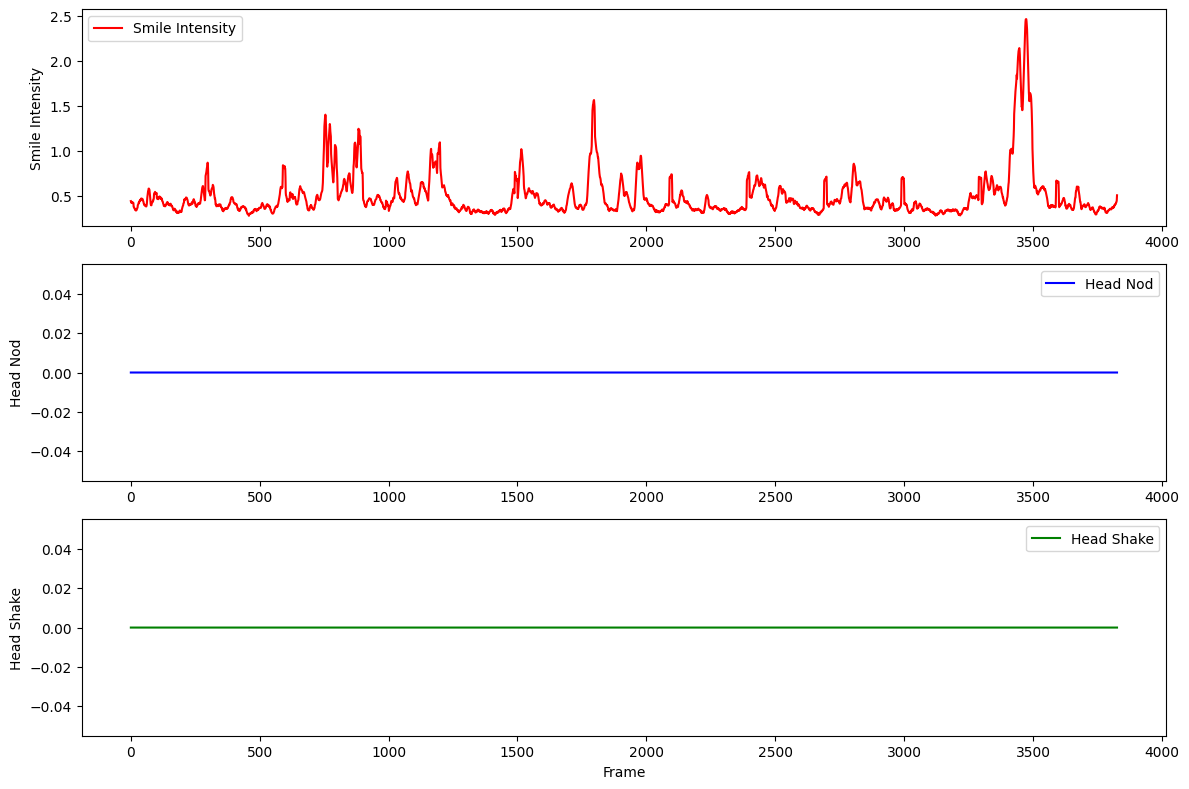

Detected 12 smile events above threshold.
Statistics saved to smile_stats.csv


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the data (change file path and separator as needed)
file_path = '/content/Smoothed-features-P61.txt'  # Use your actual filename
# Assuming the values are separated by spaces within each row of the first column
df = pd.read_csv(file_path, sep='\t', header=None)

# 2. Extract and process the smile intensity column
# Split the string in the first column by spaces and convert to numeric
all_features = df.iloc[:, 0].str.split(expand=True).astype(float)
smile_intensity = all_features.iloc[:, 1] # Assuming smile intensity is in the 13th column (index 12)


# 3. Extract head nod and head shake data (assuming they are in specific columns)

head_nod = all_features.iloc[:, 3]
head_shake = all_features.iloc[:, 4]


# 4. Plot smile intensity, head nod, and head shake
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(smile_intensity, color='red', label='Smile Intensity')
plt.ylabel('Smile Intensity')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(head_nod, color='blue', label='Head Nod')
plt.ylabel('Head Nod')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(head_shake, color='green', label='Head Shake')
plt.xlabel('Frame')
plt.ylabel('Head Shake')
plt.legend()

plt.tight_layout()
plt.show()

# 5. (Optional) Detect smile events above a threshold
def detect_smile_events(smile_data, threshold=1.0, min_duration=2):
    events = []
    in_smile = False
    start = 0
    for i, val in enumerate(smile_data):
        if not in_smile and val > threshold:
            in_smile = True
            start = i
        elif in_smile and val <= threshold:
            in_smile = False
            if i - start >= min_duration:
                events.append((start, i-1))
    return events

events = detect_smile_events(smile_intensity)
print(f"Detected {len(events)} smile events above threshold.")

# 6. (Optional) Save statistics to CSV
stats = {
    'mean': [smile_intensity.mean()],
    'std': [smile_intensity.std()],
    'max': [smile_intensity.max()],
    'min': [smile_intensity.min()],
    'num_events': [len(events)]
}
stats_df = pd.DataFrame(stats)
stats_df.to_csv('smile_stats.csv', index=False)
print("Statistics saved to smile_stats.csv")

Detected 20 smile events with dynamic threshold = 51.33 (k=1.5)


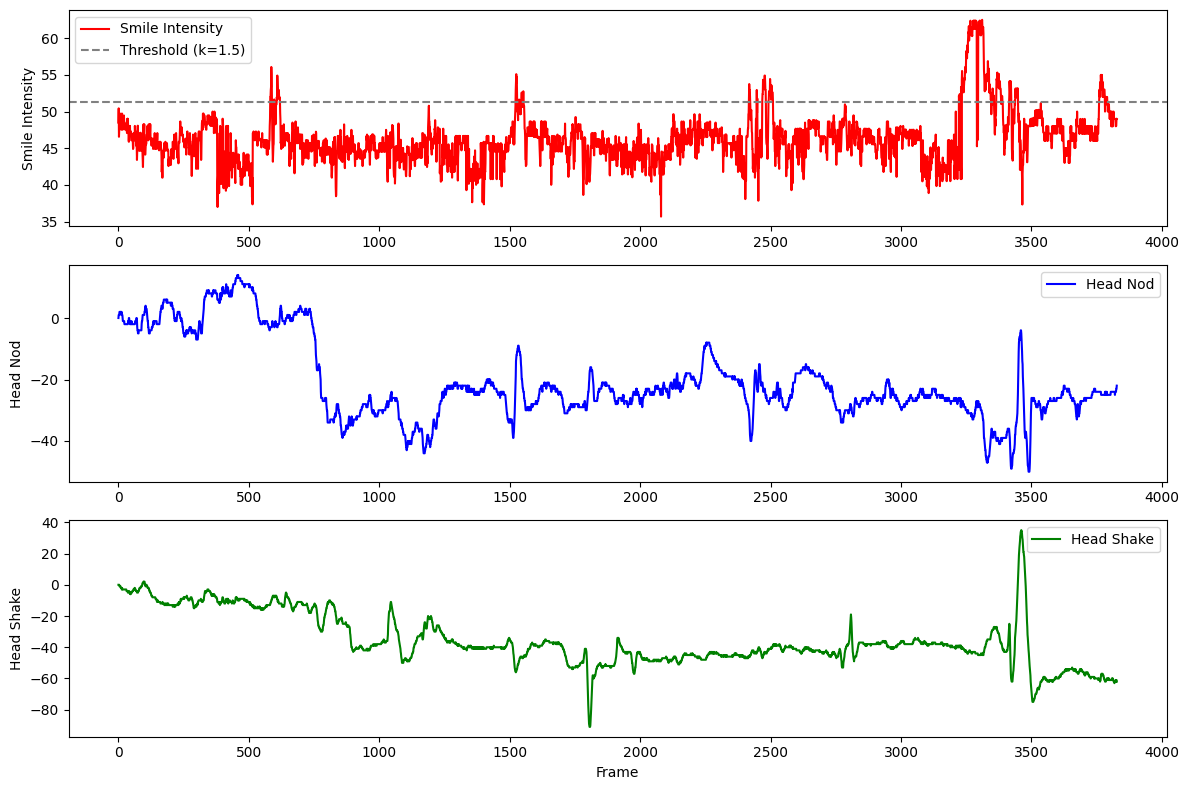

Statistics saved to smile_stats_video.csv


In [3]:
import cv2
import dlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dlib's face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')

# Initialize video capture
video_path = '/content/P61.avi'
cap = cv2.VideoCapture(video_path)

smile_intensity_list = []
head_nod_list = []
head_shake_list = []

frame_num = 0
initial_nose_y = None
initial_nose_x = None

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Smile Intensity: Distance between mouth corners
        left = np.array([landmarks.part(48).x, landmarks.part(48).y])
        right = np.array([landmarks.part(54).x, landmarks.part(54).y])
        smile_intensity = np.linalg.norm(right - left)
        smile_intensity_list.append(smile_intensity)

        # Head nod/shake: Nose tip movement (point 30)
        nose = np.array([landmarks.part(30).x, landmarks.part(30).y])

        if initial_nose_y is None:
            initial_nose_y = nose[1]
            initial_nose_x = nose[0]

        head_nod_list.append(nose[1] - initial_nose_y)
        head_shake_list.append(nose[0] - initial_nose_x)

        break  # Analyze only first detected face

    frame_num += 1

cap.release()
cv2.destroyAllWindows()

# Convert to NumPy arrays
smile_intensity = np.array(smile_intensity_list)
head_nod = np.array(head_nod_list)
head_shake = np.array(head_shake_list)

# Set k value for thresholding
k = 1.5  # You can tune this value
dynamic_threshold = smile_intensity.mean() + k * smile_intensity.std()

# Function for smile event detection
def detect_smile_events(smile_data, threshold, min_duration=2):
    events = []
    in_smile = False
    start = 0
    for i, val in enumerate(smile_data):
        if not in_smile and val > threshold:
            in_smile = True
            start = i
        elif in_smile and val <= threshold:
            in_smile = False
            if i - start >= min_duration:
                events.append((start, i-1))
    return events

# Detect smile events using dynamic threshold
events = detect_smile_events(smile_intensity, dynamic_threshold)
print(f"Detected {len(events)} smile events with dynamic threshold = {dynamic_threshold:.2f} (k={k})")

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(smile_intensity, color='red', label='Smile Intensity')
plt.axhline(y=dynamic_threshold, color='gray', linestyle='--', label=f'Threshold (k={k})')
plt.ylabel('Smile Intensity')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(head_nod, color='blue', label='Head Nod')
plt.ylabel('Head Nod')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(head_shake, color='green', label='Head Shake')
plt.xlabel('Frame')
plt.ylabel('Head Shake')
plt.legend()

plt.tight_layout()
plt.show()

# Save stats
stats = {
    'mean': [smile_intensity.mean()],
    'std': [smile_intensity.std()],
    'max': [smile_intensity.max()],
    'min': [smile_intensity.min()],
    'num_events': [len(events)],
    'threshold': [dynamic_threshold]
}
stats_df = pd.DataFrame(stats)
stats_df.to_csv('smile_stats_video.csv', index=False)
print("Statistics saved to smile_stats_video.csv")


Yawning


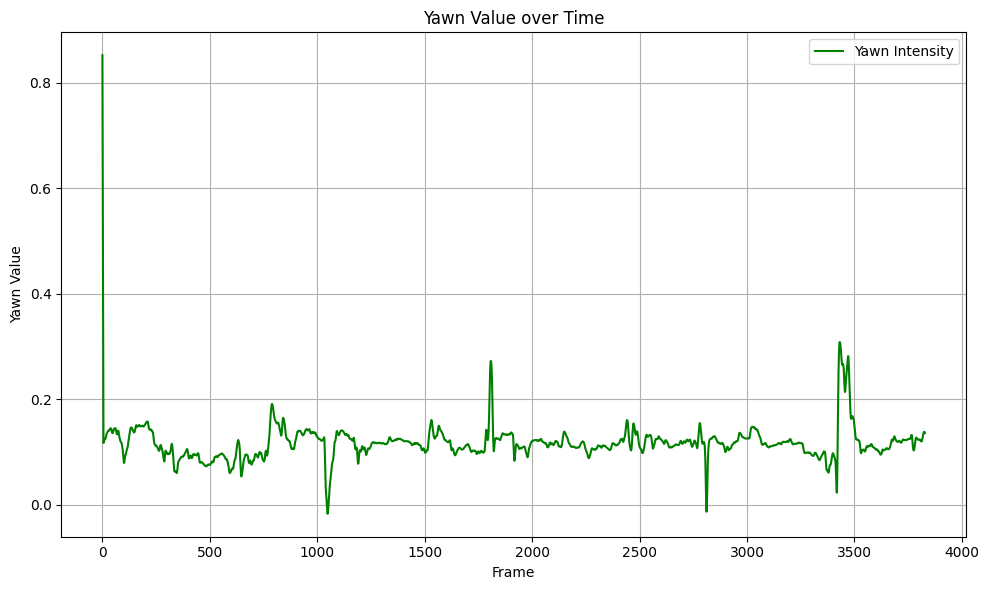

Detected 1 yawn events above threshold.
 yawn statistics saved to yawn_stats.csv


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
file_path = '/content/P61.csv'  # Update path if needed
df = pd.read_csv(file_path, sep=',', header=None)

# 2. Extract the yawn column
yawn = df.iloc[1:, 1].astype(float)

# 3. Plot the yawn values
plt.figure(figsize=(10, 6))
plt.plot(yawn, color='green', label='Yawn Intensity')
plt.xlabel('Frame')
plt.ylabel('Yawn Value')
plt.title('Yawn Value over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Detect yawn events (threshold based)
def detect_yawn_events(yawn_series, threshold=0.4, min_duration=3):
    events = []
    in_yawn = False
    start = 0
    for i, val in enumerate(yawn_series):
        if not in_yawn and val > threshold:
            in_yawn = True
            start = i
        elif in_yawn and val <= threshold:
            in_yawn = False
            if i - start >= min_duration:
                events.append((start, i-1))
    return events

# 5. Detect and report yawn events
yawn_events = detect_yawn_events(yawn)
print(f"Detected {len(yawn_events)} yawn events above threshold.")

# 6. Save simple yawn stats
stats = {
    'mean_yawn': [yawn.mean()],
    'std_yawn': [yawn.std()],
    'max_yawn': [yawn.max()],
    'min_yawn': [yawn.min()],
    'num_yawn_events': [len(yawn_events)]
}
pd.DataFrame(stats).to_csv('yawn_stats.csv', index=False)
print(" yawn statistics saved to yawn_stats.csv")


Batch Process of yawning

Detected 1 yawn events with dynamic threshold = 8.41 (k=4)


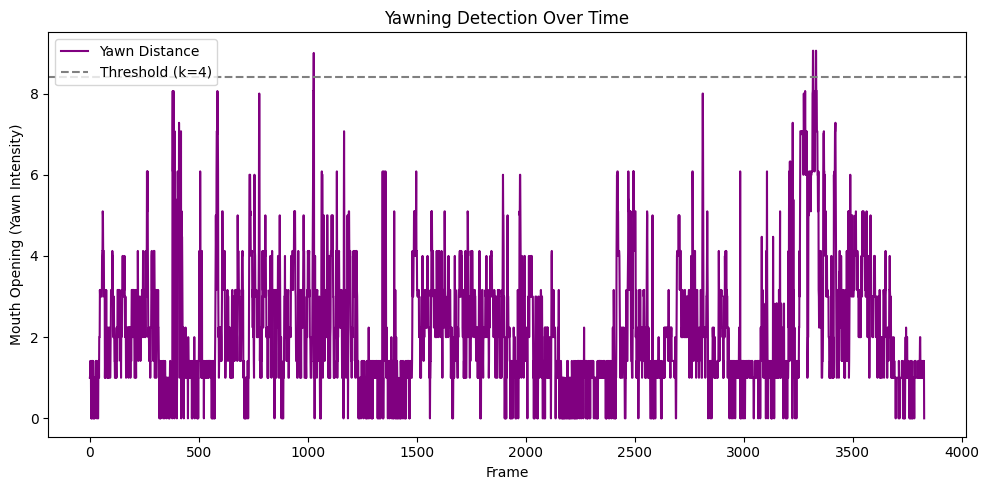

Statistics saved to yawn_stats_video.csv


In [12]:
import cv2
import dlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load models
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')

# Load video
video_path = '/content/P61.avi'
cap = cv2.VideoCapture(video_path)

yawn_distances = []
frame_num = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Yawn distance: distance between upper and lower inner lips (points 62 & 66)
        upper_lip = np.array([landmarks.part(62).x, landmarks.part(62).y])
        lower_lip = np.array([landmarks.part(66).x, landmarks.part(66).y])
        yawn_distance = np.linalg.norm(upper_lip - lower_lip)
        yawn_distances.append(yawn_distance)

        break  # Process only one face

    frame_num += 1

cap.release()
cv2.destroyAllWindows()

# Convert to numpy array
yawn_distances = np.array(yawn_distances)

# Dynamic thresholding using mean + k * std
k = 4 # You can tune this value
dynamic_threshold = yawn_distances.mean() + k * yawn_distances.std()

# Detect yawn events
def detect_yawn_events(data, threshold, min_duration=2):
    events = []
    in_yawn = False
    start = 0
    for i, val in enumerate(data):
        if not in_yawn and val > threshold:
            in_yawn = True
            start = i
        elif in_yawn and val <= threshold:
            in_yawn = False
            if i - start >= min_duration:
                events.append((start, i - 1))
    return events

yawn_events = detect_yawn_events(yawn_distances, dynamic_threshold)
print(f"Detected {len(yawn_events)} yawn events with dynamic threshold = {dynamic_threshold:.2f} (k={k})")

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(yawn_distances, label='Yawn Distance', color='purple')
plt.axhline(y=dynamic_threshold, color='gray', linestyle='--', label=f'Threshold (k={k})')
plt.title('Yawning Detection Over Time')
plt.xlabel('Frame')
plt.ylabel('Mouth Opening (Yawn Intensity)')
plt.legend()
plt.tight_layout()
plt.show()

# Save stats
stats = {
    'mean': [yawn_distances.mean()],
    'std': [yawn_distances.std()],
    'max': [yawn_distances.max()],
    'min': [yawn_distances.min()],
    'num_events': [len(yawn_events)],
    'threshold': [dynamic_threshold]
}
stats_df = pd.DataFrame(stats)
stats_df.to_csv('yawn_stats_video.csv', index=False)
print("Statistics saved to yawn_stats_video.csv")
